# Geographic Data with Basemap

In [1]:
# %pip install basemap

  Using cached numpy-1.22.4-cp39-cp39-win_amd64.whl (14.7 MB)
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37325 sha256=56e868f171f7940106a407eb26237bd98fc563c32fac7486c1de3c146386125f
  Stored in directory: c:\users\evoo\appdata\local\pip\cache\wheels\6a\73\a7\3dc684169ab99e26d1e9e25f2a939ea1886209f1b4087b4131
Successfully built pyshp
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.22.4 which is incompatible.


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


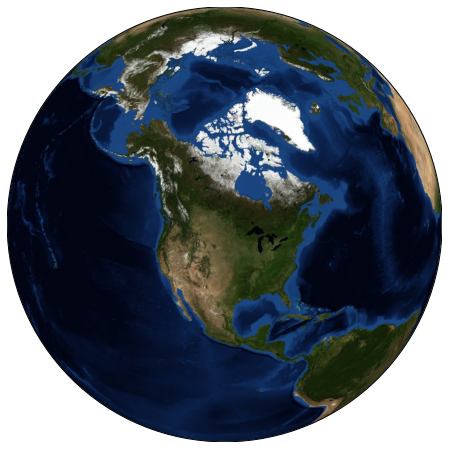

In [3]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


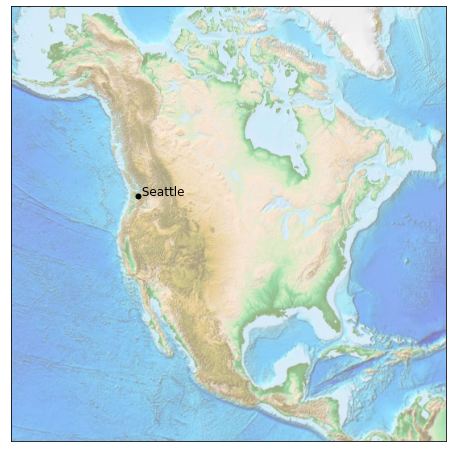

In [4]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(
    projection='lcc', resolution=None,
    width=8E6, height=8E6,
    lat_0=45, lon_0=-100,
)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Seattle', fontsize=12);

## Map Projections

In [5]:
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)

    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)

    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

### Cylindrical projections

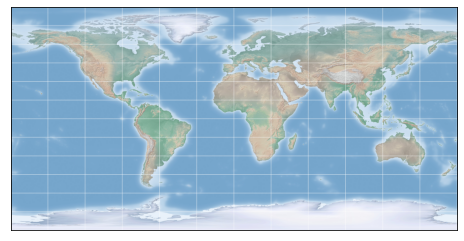

In [6]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(
    projection='cyl', resolution=None,
    llcrnrlat=-90, urcrnrlat=90,
    llcrnrlon=-180, urcrnrlon=180, 
)
draw_map(m)

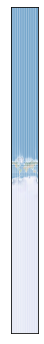

In [10]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(
    projection='merc', resolution=None,
    llcrnrlat=-90, urcrnrlat=90,
    llcrnrlon=-180, urcrnrlon=180, 
)
draw_map(m)

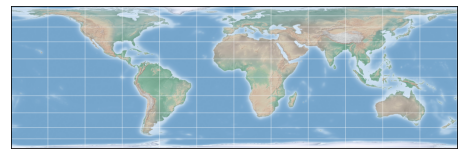

In [11]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(
    projection='cea', resolution=None,
    llcrnrlat=-90, urcrnrlat=90,
    llcrnrlon=-180, urcrnrlon=180, 
)
draw_map(m)

### Pseudo-cylindrical projections

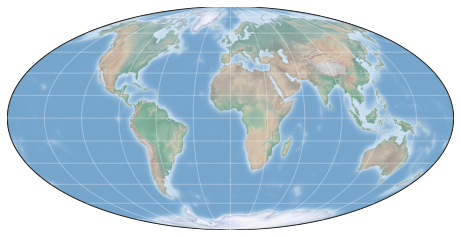

In [12]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(
    projection='moll', resolution=None,
    lat_0=0, lon_0=0
)
draw_map(m)

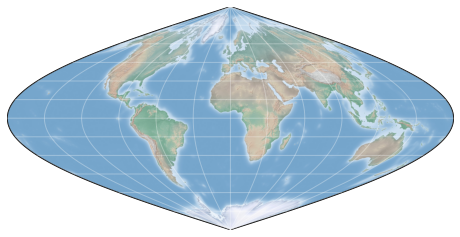

In [13]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(
    projection='sinu', resolution=None,
    lat_0=0, lon_0=0
)
draw_map(m)

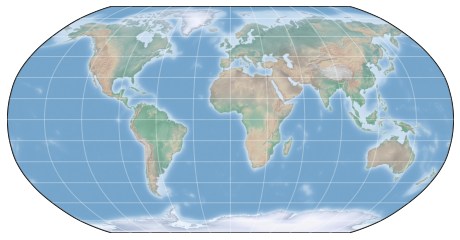

In [14]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(
    projection='robin', resolution=None,
    lat_0=0, lon_0=0
)
draw_map(m)

### Perspective projections

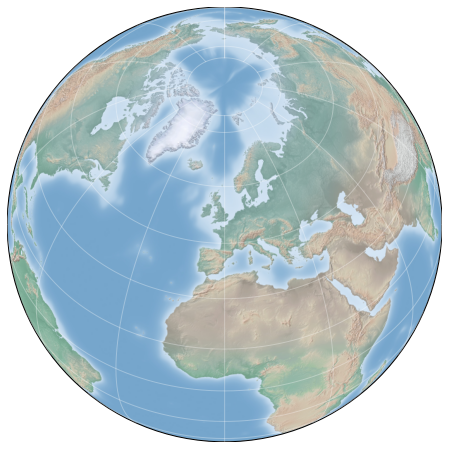

In [15]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(
    projection='ortho', resolution=None,
    lat_0=50, lon_0=0
)
draw_map(m);

### Conic projections

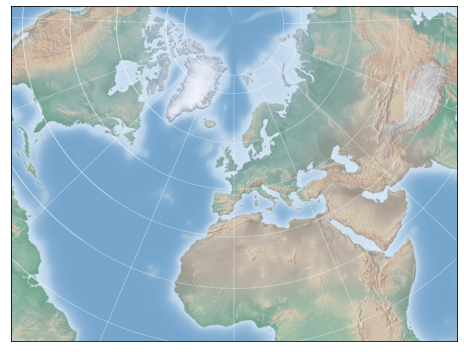

In [19]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(
    projection='lcc', resolution=None,
    lon_0=0, lat_0=50, lat_1=45, lat_2=55,
    width=1.6E7, height=1.2E7
)
draw_map(m)

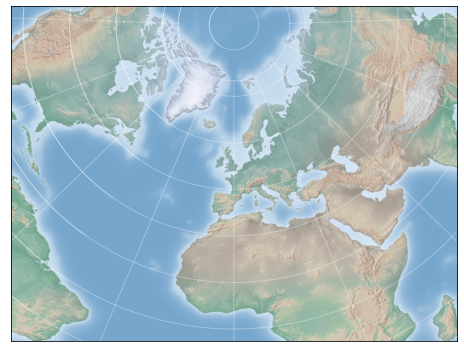

In [20]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(
    projection='eqdc', resolution=None,
    lon_0=0, lat_0=50, lat_1=45, lat_2=55,
    width=1.6E7, height=1.2E7
)
draw_map(m)

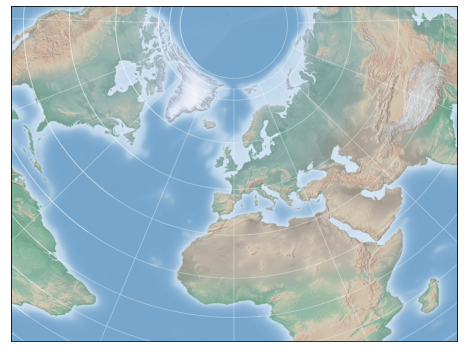

In [21]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(
    projection='aea', resolution=None,
    lon_0=0, lat_0=50, lat_1=45, lat_2=55,
    width=1.6E7, height=1.2E7
)
draw_map(m)

## Drawing a Map Background